# Exploratory Data Analysis (EDA)

### Importaciones

In [13]:
from google.colab import drive
import pandas as pd
import pickle

### Setup Consultas BigQuery

In [9]:

from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table
import matplotlib.pyplot as plt

project = 'theta-byte-412400' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

### Categorías Principales de Negocios en Yelp

En el siguiente gráfico se presentan las principales categorías de negocios obtenidos de Yelp mediante una consulta en BigQuery. Las categorías se han clasificado y se muestra la cantidad de negocios asociados con cada una. Este análisis nos brinda una visión general de las áreas comerciales más prominentes y la distribución de negocios en diferentes segmentos. La información visualizada contribuye a comprender la diversidad y prevalencia de categorías comerciales dentro de la base de datos Yelp, lo que puede ser valioso para futuros análisis y decisiones estratégicas.

SELECT
  CASE
    WHEN LOWER(categories) LIKE '%restauran%' THEN 'Restauran'
    WHEN LOWER(categories) LIKE '%hotel%' THEN 'Hotel'
    WHEN LOWER(categories) LIKE '%beauty%' THEN 'Beauty'
    WHEN LOWER(categories) LIKE '%veterinarians%' THEN 'Veterinarians'
    WHEN LOWER(categories) LIKE '%auto repair%' OR 
         LOWER(categories) LIKE '%automotive%' THEN 'Auto Repair/Automotive'
    WHEN LOWER(categories) LIKE '%banks%' THEN 'Banks'
    WHEN LOWER(categories) LIKE '%home services%' OR
         LOWER(categories) LIKE '%apartments%' OR
         LOWER(categories) LIKE '%real estate%' THEN 'Home/Apartments/Real Estate'
    WHEN LOWER(categories) LIKE '%nightlife%' THEN 'Nightlife'
    WHEN LOWER(categories) LIKE '%active life%' THEN 'Active Life'
    ELSE categories
  END AS category_group,
  COUNT(*) AS category_count
FROM
  `theta-byte-412400.YELP_BUSINESS.RAW_BUSINNES`
GROUP BY
  category_group
ORDER BY
  category_count DESC
LIMIT
  25;



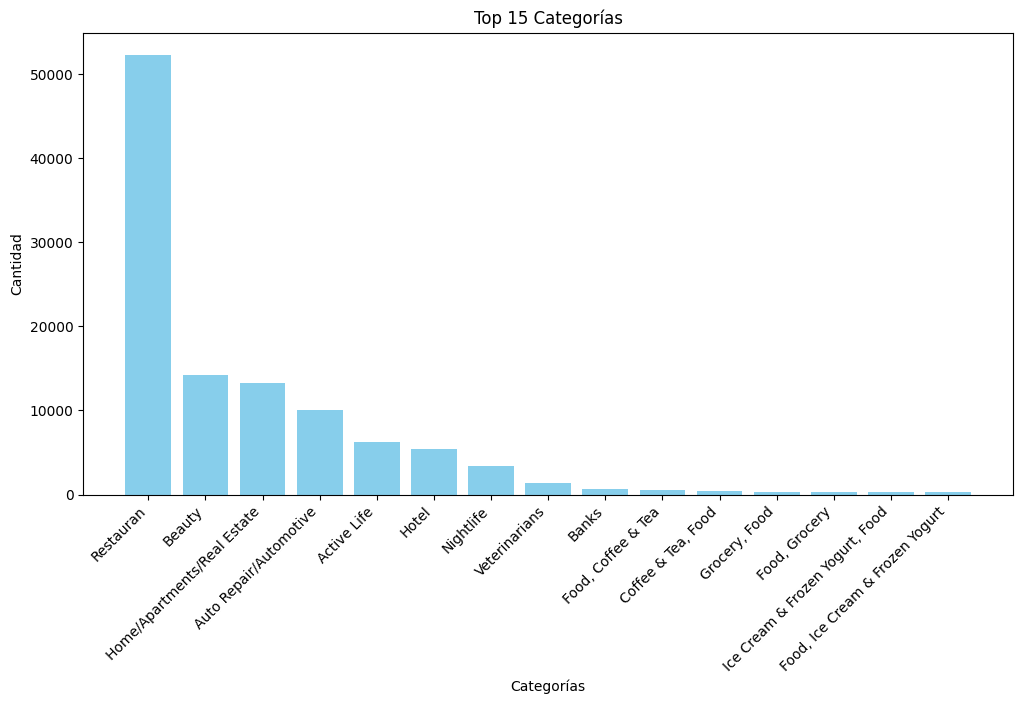

In [10]:
job = client.get_job('bquxjob_707bdb46_18d67bd4c61') # Job ID inserted based on the query results selected to explore
print(job.query)

job = client.get_job('bquxjob_707bdb46_18d67bd4c61') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

# Filtrar las primeras 15 categorías
top_categories = results.head(15)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_categories['category_group'], top_categories['category_count'], color='skyblue')
plt.xlabel('Categorías')
plt.ylabel('Cantidad')
plt.title('Top 15 Categorías')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()


siguiendo con esta linea podemos observar la cantidad de negocios brindados por YELP

In [17]:
job = client.get_job('bquxjob_622bc58a_18d67c98558') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results.head()

,Cantidad_Negocios
0,150346


### Negocios Dividos por zonas de Estados Unidos

Estos resultados proporcionan una visión general de la distribución de negocios en diferentes regiones de los Estados Unidos, lo que puede ser útil para comprender la actividad económica y las oportunidades comerciales en cada región.

In [18]:
job = client.get_job('bquxjob_6f4613dc_18d67da65ea') # Job ID inserted based on the query results selected to explore

job = client.get_job('bquxjob_6f4613dc_18d67da65ea') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,region,business_count
0,None,5578
1,Midwest,24305
2,Northeast,44843
3,South,48314
4,West,27306


podemos observar en este mapa de calor la distinta distribuciones de los negocios en todo el territorio de Estados Unidos, pero particularmente haciendo foto en el territorio de la costa Costa Oeste (West) (delimitado por la linea) donde es una de las regiones más dinámicas y económicamente activas de los Estados Unidos. Es un centro para la tecnología, la innovación, la cultura y el entretenimiento. La presencia de ciudades importantes y diversas industrias contribuye a su vitalidad y atractivo. Además, la geografía variada, que incluye playas, montañas y desiertos, agrega un atractivo adicional a la región.

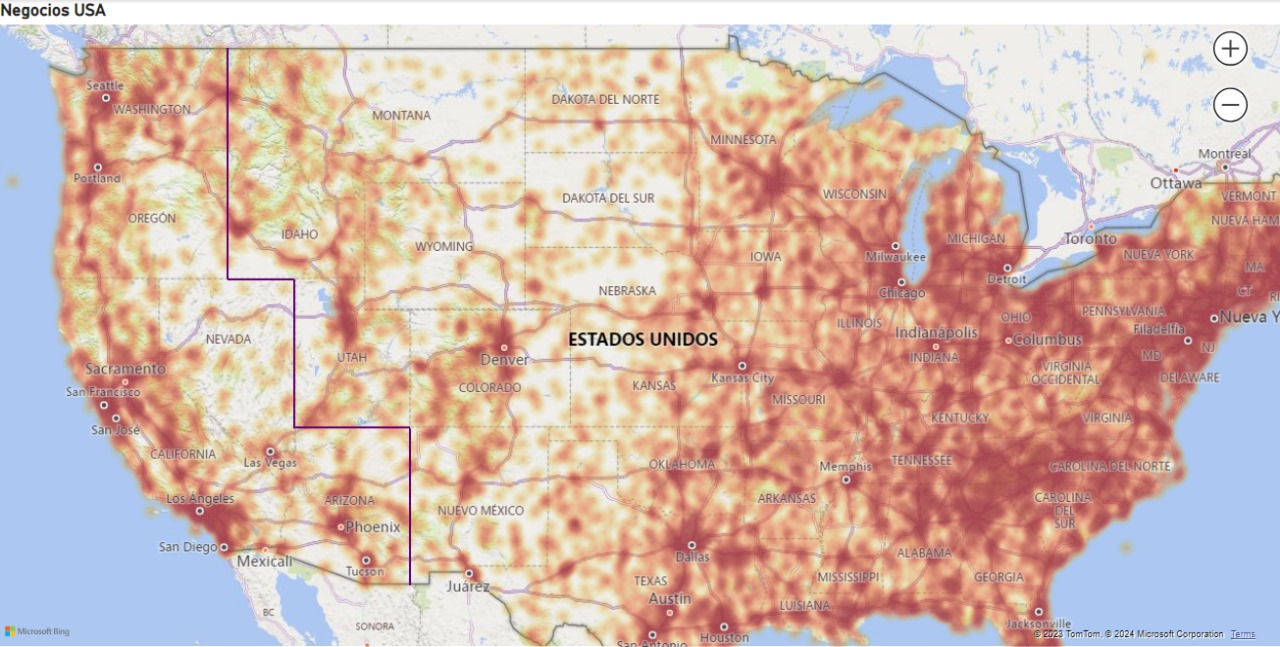

In [19]:
from IPython.display import Image
Image('/content/drive/MyDrive/Data/mapa de calor.jpg')

### Análisis de Calificaciones Promedio por Categoría

El gráfico proporciona una visión rápida de las categorías líderes en términos de calificaciones promedio y el número de negocios en cada una. Las categorías relacionadas con alimentos, belleza y servicios para el hogar son prominentes en la plataforma.

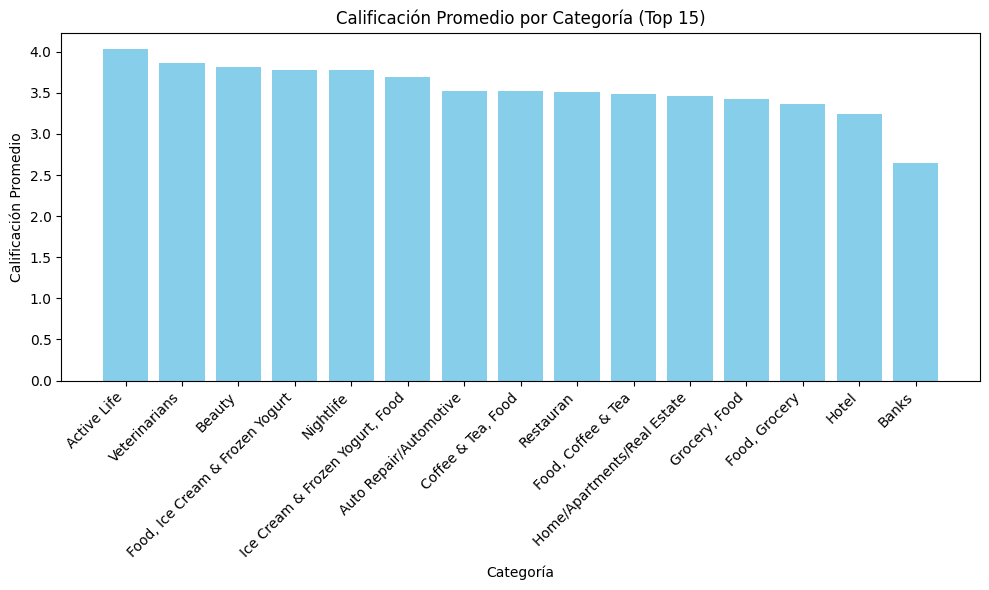

In [21]:
import matplotlib.pyplot as plt
job = client.get_job('bquxjob_8b4aa93_18d67ea906c') # Job ID inserted based on the query results selected to explore

job = client.get_job('bquxjob_8b4aa93_18d67ea906c') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

# Ordenar los resultados por calificación promedio de forma descendente
results_sorted = results.sort_values(by='average_rating', ascending=False).head(15)

# Obtener las categorías y calificaciones promedio ordenadas
category_group = results_sorted['category_group']
average_rating = results_sorted['average_rating']

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(category_group, average_rating, color='skyblue')
plt.xlabel('Categoría')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Categoría (Top 15)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Distribución de Calificaciones en Revisiones

El histograma muestra la distribución de calificaciones en las revisiones. Se observa que la mayoría de las revisiones tienen calificaciones altas, con un mayor número de calificaciones de 4 y 5 estrellas. Las calificaciones de 1 y 2 estrellas son menos frecuentes en comparación con las calificaciones más altas. Este patrón sugiere que la mayoría de los usuarios tienden a dejar calificaciones positivas en sus revisiones. La información proporcionada puede ser útil para comprender la satisfacción general de los usuarios con los negocios revisados

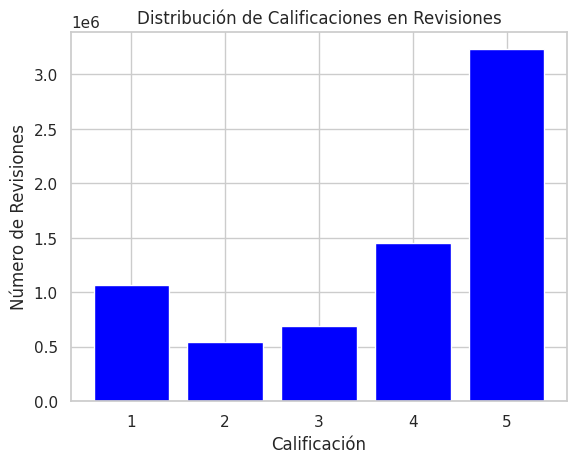

In [26]:
import matplotlib.pyplot as plt

job = client.get_job('bquxjob_52c5c972_18d67f91402') # Job ID inserted based on the query results selected to explore

job = client.get_job('bquxjob_52c5c972_18d67f91402') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results


# Obtener los datos del DataFrame
calificaciones = results['stars']
cantidad = results['count']

# Crear un histograma
plt.bar(calificaciones, cantidad, color='blue')

# Configurar el diseño del gráfico
plt.title('Distribución de Calificaciones en Revisiones')
plt.xlabel('Calificación')
plt.ylabel('Número de Revisiones en millones')

# Mostrar el gráfico
plt.show()


### Evolución de Calificaciones Promedio a lo Largo del Tiempo

El gráfico de línea presenta la evolución de las calificaciones promedio de negocios a lo largo del tiempo. En general, se observa estabilidad con fluctuaciones menores. Hubo un crecimiento inicial en 2006 y 2007, alcanzando un pico en 2006 con 3.99. A partir de 2008, las calificaciones se han mantenido relativamente constantes, indicando una satisfacción sostenida. Un aumento en 2020 sugiere posibles influencias externas en el comportamiento de calificación de los usuarios durante ese año. Este análisis proporciona una visión concisa de las tendencias clave en las calificaciones a lo largo de los años

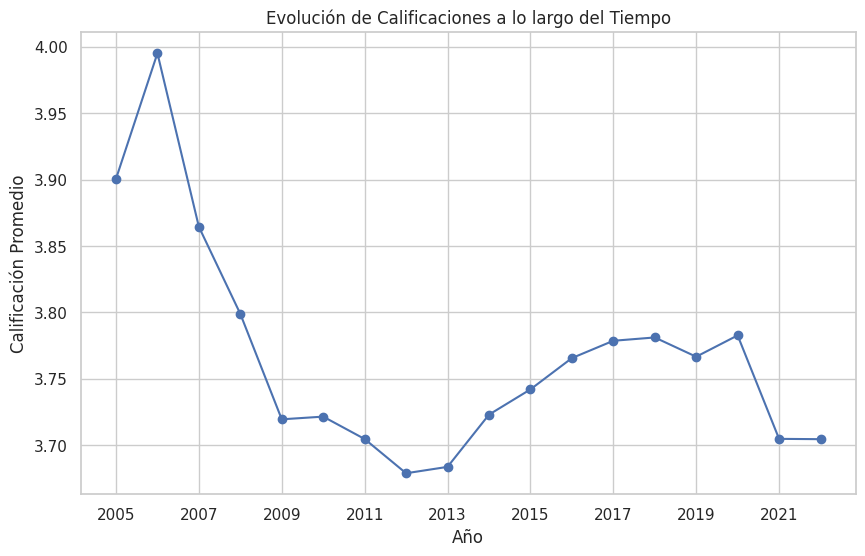

In [29]:
import matplotlib.pyplot as plt

job = client.get_job('bquxjob_4c26871a_18d68018e8e') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

years = results['year'].astype(int)  # Convertir a tipo entero
average_ratings = results['average_rating']

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(years, average_ratings, marker='o', linestyle='-', color='b')

# Configuración del gráfico
plt.title('Evolución de Calificaciones a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Calificación Promedio')
plt.grid(True)

# Configurar los ticks del eje x para mostrar cada 2 años
plt.xticks(years[::2])

# Mostrar el gráfico
plt.show()

### Distribución de Calificaciones y Reseñas por Región Geográfica en Negocios


En el análisis anterior, observamos que las diferencias en el promedio de calificación entre las cuatro principales regiones de Estados Unidos son mínimas. Sin embargo, lo más destacado se encuentra en las diferencias en el número de reseñas. La región "West" lidera con la calificación promedio más alta y el mayor número de reseñas, seguida por "Northeast" y "Midwest". Aunque "South" tiene una calificación promedio ligeramente más baja, destaca por un impresionante recuento total de reseñas. Estas variaciones sugieren que, mientras que la satisfacción de los usuarios es relativamente consistente, la participación y la actividad de revisión varían significativamente entre las regiones. Esta información puede ser valiosa para empresas y usuarios interesados en entender la dinámica y la presencia en línea en diferentes partes de Estados Unidos.

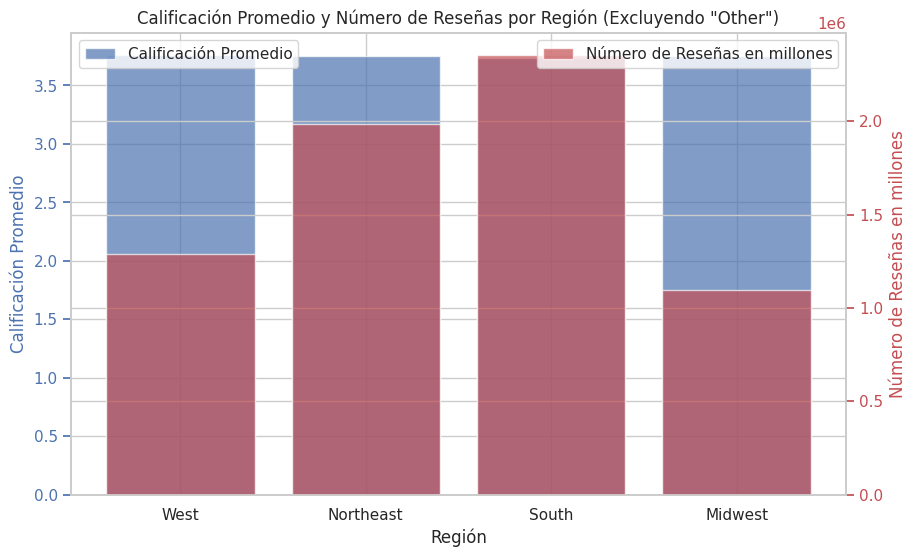

In [33]:
job = client.get_job('bquxjob_5a5656fc_18d680f6728') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

# Filtrar datos para excluir la región "Other"
filtered_results = results[results['region'] != 'Other']

# Datos filtrados
regions_filtered = filtered_results['region']
average_ratings_filtered = filtered_results['average_rating']
review_counts_filtered = filtered_results['review_count']

# Crear gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barra izquierda para la calificación promedio
ax1.bar(regions_filtered, average_ratings_filtered, color='b', alpha=0.7, label='Calificación Promedio')
ax1.set_xlabel('Región')
ax1.set_ylabel('Calificación Promedio', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(loc='upper left')

# Barra derecha para el número de reseñas
ax2 = ax1.twinx()
ax2.bar(regions_filtered, review_counts_filtered, color='r', alpha=0.7, label='Número de Reseñas en millones')
ax2.set_ylabel('Número de Reseñas en millones', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(loc='upper right')

# Título y mostrar gráfico
plt.title('Calificación Promedio y Número de Reseñas por Región (Excluyendo "Other")')
plt.show()


In [34]:
results

,region,average_rating,review_count
0,West,3.762869,1290626
1,Northeast,3.750743,1987011
2,Other,3.745679,260667
3,South,3.737205,2356053
4,Midwest,3.752997,1095923


### CSV TRANSFORMADO Y NORMALIZADO

se realizan las importacion del archivo con los datos transformados, normalizados y extraidos de los datos que nos fueron suministrados

In [9]:
# Ruta al archivo en Google Drive
archivo_drive1 = '/content/drive/My Drive/Data/data.json'

# Cargar el archivo en un DataFrame
Review_Business = pd.read_json(archivo_drive1, lines=True)